<a href="https://colab.research.google.com/github/akeshri003/bookish-meme/blob/main/02_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Neural Network classification with PyTorch

Classification is a problem of predicting whether something is one or another (there can be multiple things as the optioins).

## 1. Make some classification data and get it ready

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
print(f"First 5 samples of X: {X[:5]}") # we have two features of each X
print(f"First 5 samples of y: {y[:5]}")


First 5 samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: [1 1 1 1 0]


In [ ]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


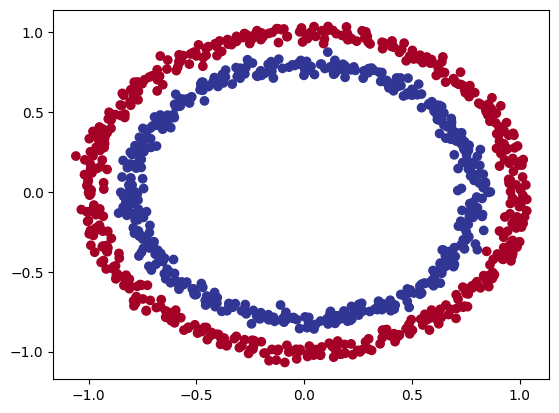

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

Note: the data we are working with is often referred to as a toy dataset, a dataset that is small enough to experiment but stilll sizeable enough to practise the fundamentals


### 1.1 Check input and output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test splits

In [ ]:
import torch

In [ ]:
# Turn data into Tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
# Split data into training and test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Buildin a model

Model to classify blue and red dots.

To do so, we want to:
1. Setup device agnostic code so our code will run on an accelerator (GPU) if there is one
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and OptimizeResult
4. Creating training and testing loop

In [ ]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

Now we've device agnostic code, let;s create a model:

1. Subclass `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Defines a `forward()` method that outlines the forward pass (or forward computation) of the model
4. Instantiate an instance of our model classs and send it to the target `device`

In [ ]:
from torch import nn
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()

    # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
    # self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 features
    # self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from previous layer and outputs a single feature (same shape as y)

    self.two_linear_layers = nn.Sequential(
        nn.Linear(in_features=2, out_features=5),
        nn.Linear(in_features=5, out_features=1)
    )
  # 3. Define a forward() method that outlines the forward pass
  def forward(self, x):
    # return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output
    return self.two_linear_layers(x)

# 4. Instantiates an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [ ]:
device

'cpu'

In [ ]:
next(model_0.parameters())

Parameter containing:
tensor([[-0.5988,  0.4893],
        [-0.1946, -0.2711],
        [-0.5869, -0.7030],
        [ 0.2023, -0.1545],
        [ 0.2753, -0.5803]], requires_grad=True)

In [ ]:
# Replicating the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1),
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.5293,  0.6441],
                      [-0.5190,  0.3779],
                      [ 0.2485,  0.2298],
                      [-0.3823,  0.6427],
                      [ 0.1554,  0.0910]])),
             ('0.bias', tensor([-0.6231,  0.2968, -0.1061, -0.3239,  0.6074])),
             ('1.weight',
              tensor([[ 0.0997, -0.2474, -0.2264, -0.0214,  0.2497]])),
             ('1.bias', tensor([-0.1143]))])

In [ ]:
# Make Predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape} ")
print(f"\nFirst 10 predictions: \n {untrained_preds[:10]}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2]) 

First 10 predictions: 
 tensor([[-0.1415],
        [-0.1357],
        [-0.0911],
        [-0.1561],
        [ 0.0132],
        [ 0.0160],
        [-0.0502],
        [-0.0144],
        [-0.0956],
        [-0.1341]])

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
### 2.1 Setup loss function and optimizer



In [ ]:
# Setup the loss function
# loss_fn = BCELoss() # BCELoss() = requires inputs to have gone through the sigmoid activation function prior to input to BCELoss
# nn.Sequential(
#     nn.Sigmoid(),
#     nn.BCELoss()
# )
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built-in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [ ]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right?

def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item() # no.of samples where y_true = y_pred.
  acc = (correct/len(y_pred))*100
  return acc

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.5293,  0.6441],
                      [-0.5190,  0.3779],
                      [ 0.2485,  0.2298],
                      [-0.3823,  0.6427],
                      [ 0.1554,  0.0910]])),
             ('0.bias', tensor([-0.6231,  0.2968, -0.1061, -0.3239,  0.6074])),
             ('1.weight',
              tensor([[ 0.0997, -0.2474, -0.2264, -0.0214,  0.2497]])),
             ('1.bias', tensor([-0.1143]))])

### 3. Train Model

To train our model, we're going to build a training loop:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer step(gradient descent)

### 3.1 Going from raw logits -L predictions probablities -> predictions labels

Our model outputs are goig to be raw **logits**

We can convert these logits to **prediction probabilities*  by passing them to some kind of activation function (e.g., sigmoid for binary classification and softmax for multiclass classification)

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`

In [ ]:
# View rhe first 5 outputs of the forward pass on the test data
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.1415],
        [-0.1357],
        [-0.0911],
        [-0.1561],
        [ 0.0132]])

In [ ]:
# Use sigmoid activation function on our model logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4647],
        [0.4661],
        [0.4772],
        [0.4611],
        [0.5033]])

For our prediction probability values we need to form a range style rounding on them:
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < 0.5, `y=0` (class 0)

In [ ]:
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 1.])

### 3.2 Building Training and testing loop

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)


epochs = 1000


for epoch in range(epochs):
  model_0.train()
  # Forward pass
  y_logits = model_0(X_train.to(device)).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

  # train lossx
  # loss = loss_fn(torch.round(torch.sigmoid(y_logits)), y_train) # nn.BCELoss expects prediction probabilities as input
  # nn.BCEWithLogitsLoss expects raw logits as input
  loss = loss_fn(y_logits, y_train.to(device)) # we are passing y_logits and not y_pred cause our loss function itself takes sigmoid function
  acc = accuracy_fn(y_true=y_train.to(device), y_pred=y_pred)

  # optimizer zero grad
  optimizer.zero_grad()

  # back-propagation
  loss.backward()

  # gradient descent
  optimizer.step()

  ## Testing
  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test.to(device))
    test_pred = torch.round(torch.sigmoid(test_logits))

    y_test_loss = loss_fn(test_pred.squeeze(), y_test.to(device))
    test_acc = accuracy_fn(y_true=y_test.to(device),
                           y_pred=test_pred)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Train_accuracy: {acc:.2f}% | Test loss: {y_test_loss:.5f}, Test accuracy: {test_acc:.2f}")




Epoch: 0 | Loss: 0.69443, Train_accuracy: 45.00% | Test loss: 0.73667, Test accuracy: 10000.00
Epoch: 10 | Loss: 0.69395, Train_accuracy: 47.38% | Test loss: 0.73438, Test accuracy: 10000.00
Epoch: 20 | Loss: 0.69367, Train_accuracy: 48.00% | Test loss: 0.73728, Test accuracy: 10000.00
Epoch: 30 | Loss: 0.69349, Train_accuracy: 48.38% | Test loss: 0.74658, Test accuracy: 10000.00
Epoch: 40 | Loss: 0.69337, Train_accuracy: 48.38% | Test loss: 0.74589, Test accuracy: 10000.00
Epoch: 50 | Loss: 0.69328, Train_accuracy: 49.00% | Test loss: 0.75158, Test accuracy: 10000.00
Epoch: 60 | Loss: 0.69321, Train_accuracy: 49.62% | Test loss: 0.75778, Test accuracy: 10000.00
Epoch: 70 | Loss: 0.69316, Train_accuracy: 49.38% | Test loss: 0.76589, Test accuracy: 10000.00
Epoch: 80 | Loss: 0.69313, Train_accuracy: 48.62% | Test loss: 0.74379, Test accuracy: 10000.00
Epoch: 90 | Loss: 0.69310, Train_accuracy: 48.62% | Test loss: 0.75049, Test accuracy: 10000.00
Epoch: 100 | Loss: 0.69308, Train_accurac

## 4. Make predictions and evaluate the model

From the metics it looks like our model isnt learning anything...

So to inspect it, let' make some predictions and make them visual

To do so, we're going to import a function called, `plot decision boundary()`



In [ ]:
!pip install requests

In [ ]:
import requests
from pathlib import Path

# Download helper function from LearnPyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Download helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


In [ ]:
import numpy as np
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


# Plot linear data or training and test and predictions (optional)
def plot_predictions(
    train_data, train_labels, test_data, test_labels, predictions=None
):
    """
  Plots linear training data and test data and compares predictions.
  """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})



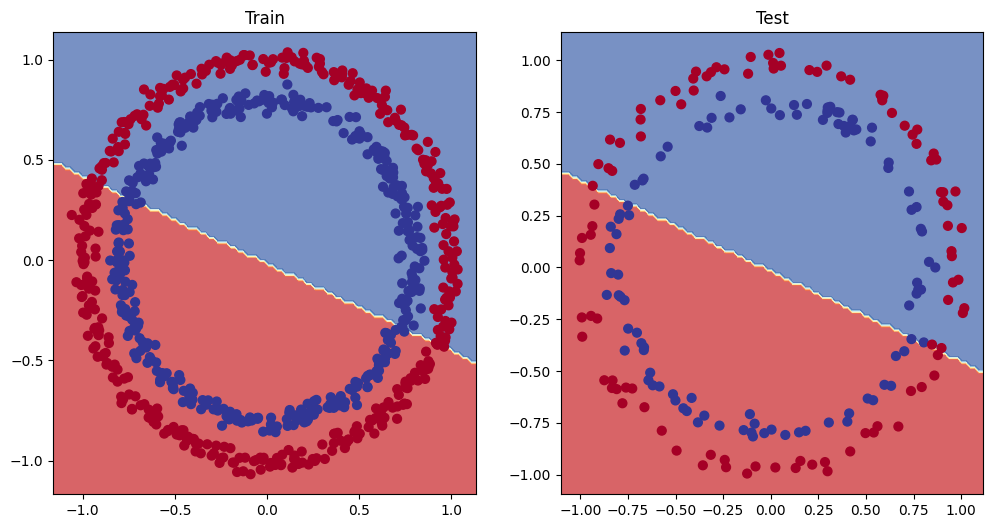

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1) # (# rows, # cols, # index of subplot)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)

plt.subplot(1, 2, 2) # (# rows, # cols, #index of subplot)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## Improving a model (from a model perspective)

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units in the layers
* Fit for longer
* Changing the activation functions
* Change the learning rate

These options are all from a model's perspective because hey deal directly with the model rather than the data.

And because these options are all values we as machine learning engineers and data scientists can change, ghey are referred to as hyper-parameters.

Let's try and improve our model by
* Adding more hidden units: 5->10
* Increase the number of layers: 2 ->3
* Icrease the number of epochs: 100 -> 1000

Generally control only one change at a time

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)

  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x))) # this way of writing operations leverages speed ups where possible

model_1 = CircleModelV1().to(device)
model_1


CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Loss function
loss_fn = nn.BCEWithLogitsLoss()

# Optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr = 0.1)

In [ ]:
# Training and evaluation loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

for epoch in range(epochs):
  model_1.train()
  # Forward pass
  y_logits = model_1(X_train.to(device)).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

  # Calculate loss
  loss = loss_fn(y_logits, y_train.to(device))
  acc = accuracy_fn(y_train, y_preds)

  # Optmizer zero_grad
  optimizer.zero_grad()

  # brackward propagation
  loss.backward()

  # gradient descent
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test.to(device)).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test.to(device))
    test_acc = accuracy_fn(y_test, test_preds)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss}, Accuracy: {acc} | Test loss: {test_loss}, Test Accuracy: {test_acc}")


Epoch: 0 | Loss: 0.6939550638198853, Accuracy: 50.875 | Test loss: 0.6926146149635315, Test Accuracy: 51.0
Epoch: 10 | Loss: 0.6936882138252258, Accuracy: 50.24999999999999 | Test loss: 0.6927037239074707, Test Accuracy: 50.0
Epoch: 20 | Loss: 0.6935124397277832, Accuracy: 50.125 | Test loss: 0.6928302049636841, Test Accuracy: 49.5
Epoch: 30 | Loss: 0.6933860778808594, Accuracy: 50.5 | Test loss: 0.6929664015769958, Test Accuracy: 48.0
Epoch: 40 | Loss: 0.6932918429374695, Accuracy: 50.375 | Test loss: 0.693103015422821, Test Accuracy: 49.0
Epoch: 50 | Loss: 0.6932203769683838, Accuracy: 49.875 | Test loss: 0.6932356953620911, Test Accuracy: 50.0
Epoch: 60 | Loss: 0.6931658387184143, Accuracy: 49.375 | Test loss: 0.6933621764183044, Test Accuracy: 51.5
Epoch: 70 | Loss: 0.693123996257782, Accuracy: 49.375 | Test loss: 0.6934814453125, Test Accuracy: 50.5
Epoch: 80 | Loss: 0.693091869354248, Accuracy: 50.125 | Test loss: 0.6935926675796509, Test Accuracy: 50.0
Epoch: 90 | Loss: 0.693067

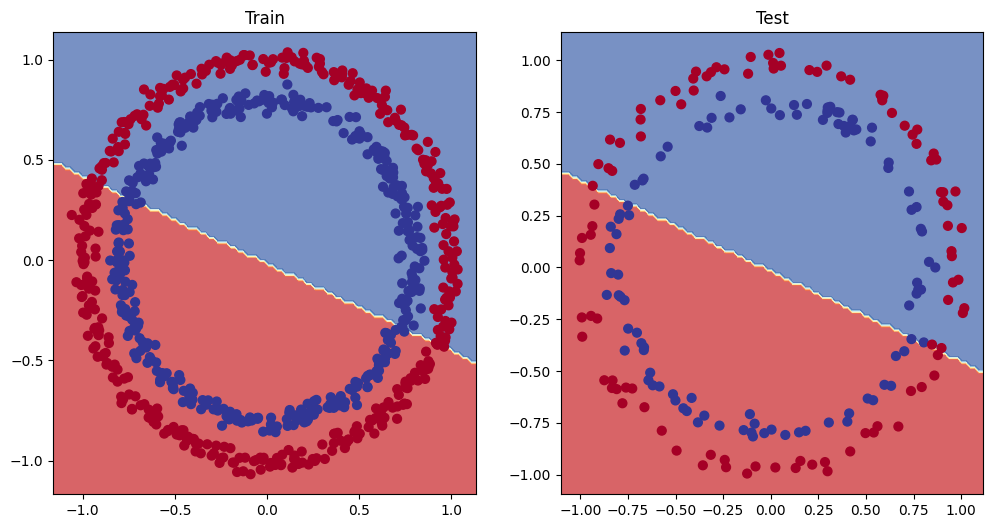

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1) # (# rows, # cols, # index of subplot)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)

plt.subplot(1, 2, 2) # (# rows, # cols, #index of subplot)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

### 5.1 Perparing data to see if our model can fit a straight line

One way to troubleshoot a large poblem is to test out a smaller problem.

In [ ]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # linear regression formula

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
# Create train & test split
train_Split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_Split], y_regression[:train_Split]
X_test_regression, y_test_regression = X_regression[train_Split:], y_regression[train_Split:]

len(X_train_regression), len(y_train_regression), len(X_test_regression),len(y_test_regression)

(80, 80, 20, 20)

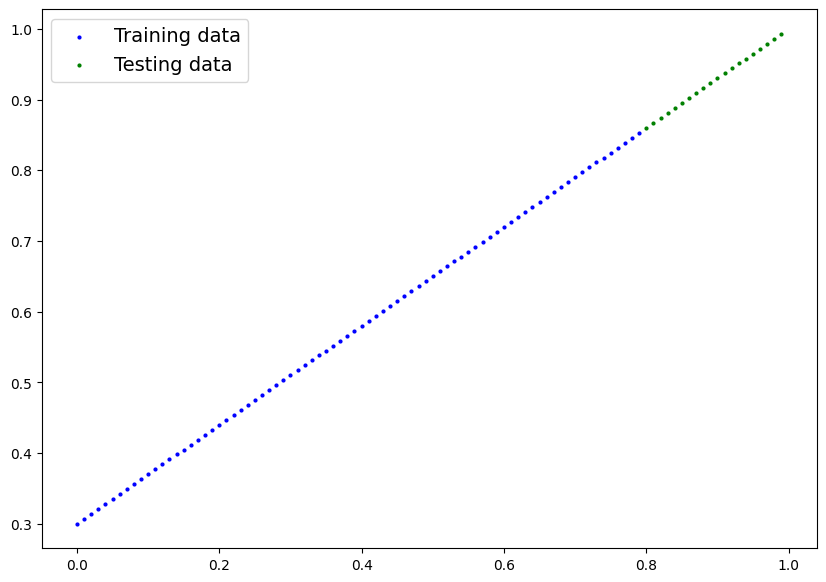

In [ ]:
plot_predictions(train_data = X_train_regression,
                 train_labels = y_train_regression,
                 test_data = X_test_regression,
                 test_labels=y_test_regression)

### 5.2 Adjusting `model_1` to fit a straight line


In [ ]:
# Same achitecture as model_1 (but using nn.Sequential())
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_2.parameters(), lr=0.001)

In [ ]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
  model_2.train()
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.75986 | Test Loss: 0.94965
Epoch: 100 | Loss: 0.40272 | Test Loss: 0.54029
Epoch: 200 | Loss: 0.05876 | Test Loss: 0.13480
Epoch: 300 | Loss: 0.01461 | Test Loss: 0.03342
Epoch: 400 | Loss: 0.00308 | Test Loss: 0.00008
Epoch: 500 | Loss: 0.00309 | Test Loss: 0.00012
Epoch: 600 | Loss: 0.00309 | Test Loss: 0.00018
Epoch: 700 | Loss: 0.00299 | Test Loss: 0.00011
Epoch: 800 | Loss: 0.00299 | Test Loss: 0.00016
Epoch: 900 | Loss: 0.00289 | Test Loss: 0.00011


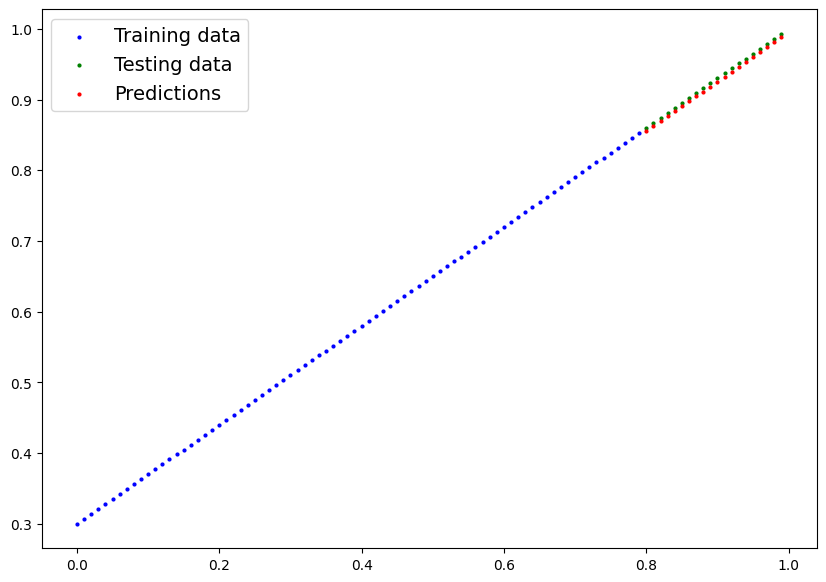

In [ ]:
# Turn on evaluation mode
model_2.eval()

with torch.inference_mode():
  y_preds = model_2(X_test_regression)

plot_predictions(train_data = X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu())

In [ ]:
# Build model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [ ]:
# loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr = 0.01)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_3.train()

  # 1. Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate the loss
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
  loss = loss_fn(y_logits, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 2. loss backward
  loss.backward()

  # 5. gradient descent
  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_acc = accuracy_fn(y_test, test_pred)
    test_loss = loss_fn(test_logits, y_test)

    if epoch % 100 == 0:
      print(f"epoch: {epoch} | Loss: {loss}, Acc: {acc} | Test loss: {test_loss}, Test Acc: {test_acc}")




epoch: 0 | Loss: 0.6929463148117065, Acc: 50.0 | Test loss: 0.6932452917098999, Test Acc: 50.0
epoch: 100 | Loss: 0.6924796104431152, Acc: 50.375 | Test loss: 0.6926424503326416, Test Acc: 50.0
epoch: 200 | Loss: 0.692247748374939, Acc: 59.0 | Test loss: 0.6923322081565857, Test Acc: 56.00000000000001
epoch: 300 | Loss: 0.6920937299728394, Acc: 70.125 | Test loss: 0.6921403408050537, Test Acc: 67.0
epoch: 400 | Loss: 0.6919492483139038, Acc: 68.375 | Test loss: 0.6919655799865723, Test Acc: 70.0
epoch: 500 | Loss: 0.6918092370033264, Acc: 58.5 | Test loss: 0.6917903423309326, Test Acc: 62.0
epoch: 600 | Loss: 0.6916759014129639, Acc: 54.0 | Test loss: 0.6916257739067078, Test Acc: 56.00000000000001
epoch: 700 | Loss: 0.691547691822052, Acc: 53.25 | Test loss: 0.6914775967597961, Test Acc: 53.0
epoch: 800 | Loss: 0.6914125084877014, Acc: 52.625 | Test loss: 0.6913283467292786, Test Acc: 53.0
epoch: 900 | Loss: 0.6912801265716553, Acc: 52.75 | Test loss: 0.6911811828613281, Test Acc: 53.

## 6.4 Evaluating a model trained with non linear activation functions

In [ ]:
# Make predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

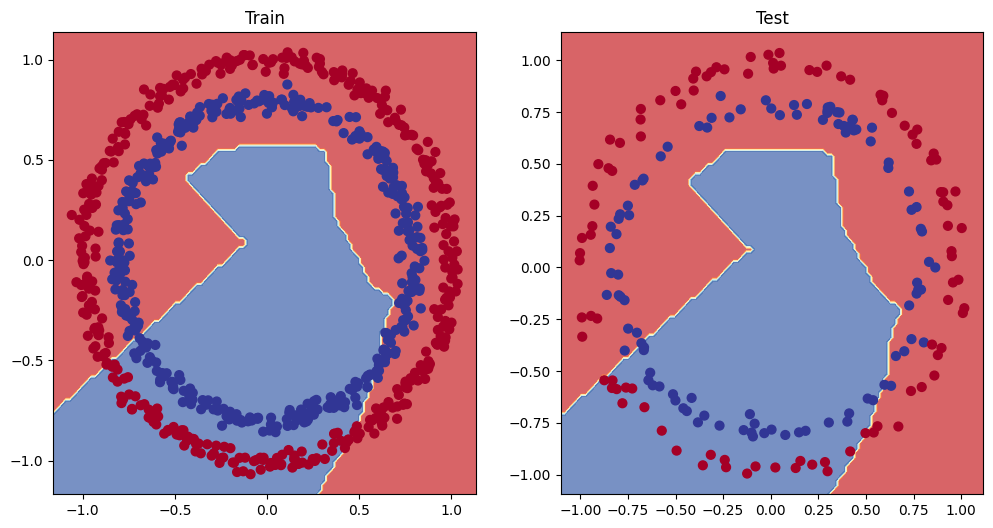

In [ ]:
# Plotting decision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

In [ ]:
# Create a toy tensor (similar to the data going into our model(s))
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

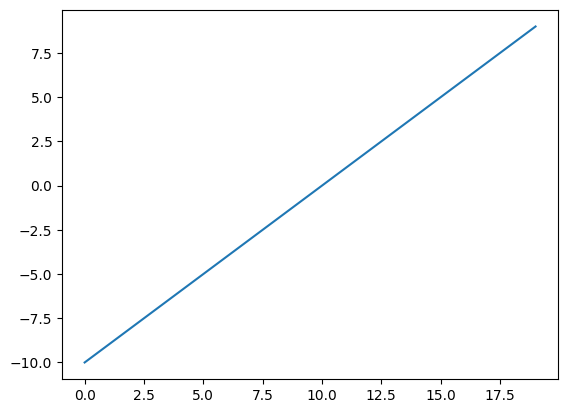

In [ ]:
# Visualize the toy tensor
plt.plot(A);

In [ ]:
# Create ReLU function by hand
def relu(x):
  return torch.maximum(torch.tensor(0), x) # inputs must be tensors

# Pass toy tensor through ReLU function
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

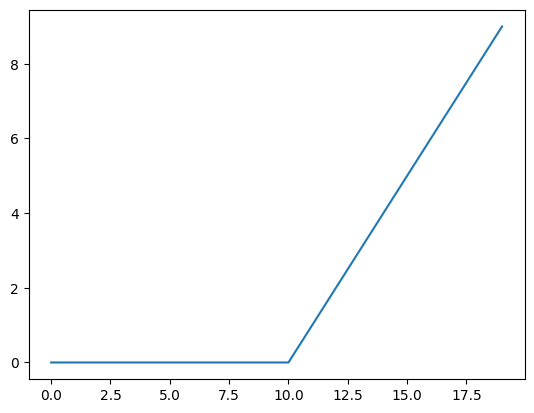

In [ ]:
# Plot ReLU activated toy tensor
plt.plot(relu(A));

In [ ]:
# Create a custom sigmoid function
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

# Test custom sigmoid on toy tensor
sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

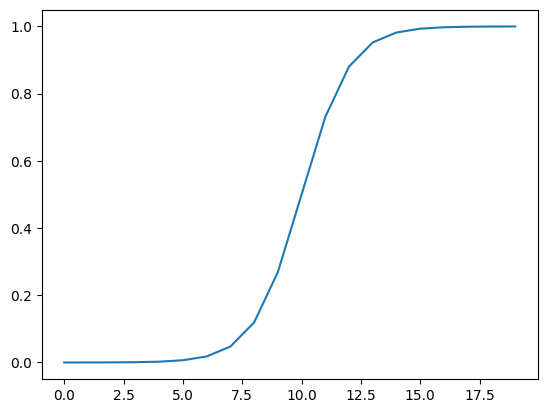

In [ ]:
# Plot sigmoid activated toy tensor
plt.plot(sigmoid(A));

# 8. Putting it all together with a multi-class classification problem

* Binary classification = one thing or another
* Mutli-class Classification = more than one thing or another

### 8.1 Creating a multi-class dataset

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


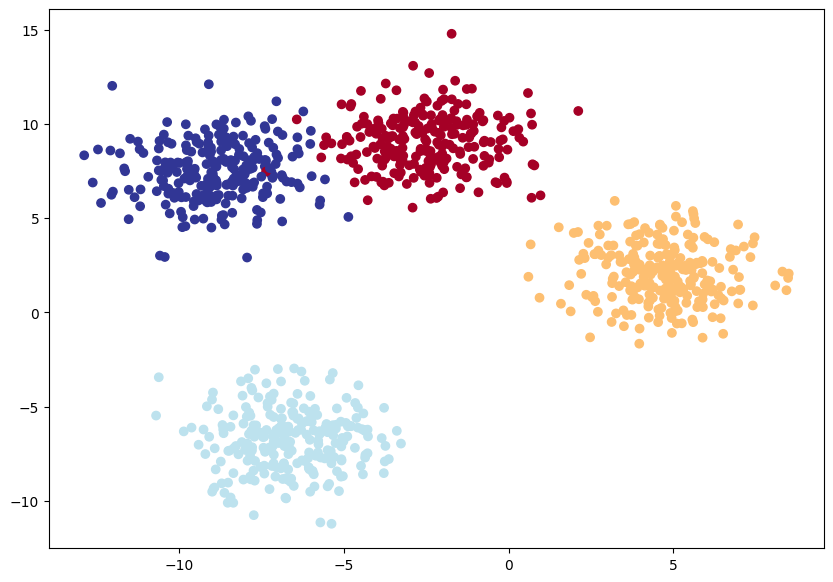

In [ ]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

### 8.2 Building a multiclass classification problem in PyTorch

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
from torch import nn
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """Initialises multiclass classification model.

    Args:
      input_features (int): number of input features to the model
      output_features (int): Number of output features.
      hidden_units (int): Number of hidden units between layers, default 8

    Returns:

    Example:
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)


model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)

model_4


BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

### 8.3 Create a loss function and an optimizer for a multi-class classification model

In [ ]:
# Create a loss function for multi-class classification
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer for multi-class classification
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)

### 8.4 Getting prediction probabilities for a multi-class PyTorch model

In ourder to evaluate and train and test our model, we need to convert our model's  outputs (logits) to prediction probabilites and then prediction labels.

Logits -> prediction probabilities (use `torch.softmax`) -> Prediction labels (take the `argmax` of the prediction prob.)

In [ ]:
next(model_4.parameters()).device

device(type='cpu')

In [ ]:
X_blob_test.device

device(type='cpu')

In [ ]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))
y_logits

tensor([[-7.6459e-01, -7.4120e-01, -1.5777e+00, -1.1376e+00],
        [-9.7256e-02, -9.4310e-01, -5.9631e-01, -1.3715e-01],
        [ 2.5277e-01, -2.3794e-01,  1.8817e-01, -6.5686e-03],
        [-4.1340e-01, -5.2042e-01, -9.3033e-01, -6.9626e-01],
        [-3.1184e-01, -1.3736e+00, -1.1991e+00, -3.8337e-01],
        [-1.4971e-01, -1.0617e+00, -7.1069e-01, -1.6452e-01],
        [ 1.5388e-01, -2.8874e-01,  1.5199e-01, -1.0874e-02],
        [-2.1543e-01, -1.1795e+00, -9.3000e-01, -2.7448e-01],
        [ 2.4432e-01, -2.4716e-01,  1.6492e-01,  6.1045e-03],
        [-2.3286e-01, -1.2120e+00, -9.8487e-01, -3.0037e-01],
        [-1.7742e-01, -1.1008e+00, -8.2929e-01, -2.3689e-01],
        [-9.4082e-01, -7.8985e-01, -1.8480e+00, -1.3347e+00],
        [-2.9723e-01, -1.3458e+00, -1.1543e+00, -3.6287e-01],
        [-2.9006e-01, -1.3393e+00, -1.1146e+00, -3.3518e-01],
        [-3.3713e-01, -1.4374e+00, -1.2379e+00, -3.8029e-01],
        [-1.0260e-01, -9.5066e-01, -6.1913e-01, -1.5105e-01],
        

In [ ]:
y_logits[:10]

tensor([-0.0057, -0.0151, -0.0096, -0.0076, -0.0122, -0.0014, -0.0108, -0.0123,
        -0.0208, -0.0310], grad_fn=<SliceBackward0>)

In [ ]:
y_pred_probs = torch.softmax(y_logits, dim = 1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]])
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]])


In [ ]:
torch.sum(y_pred_probs[0])

tensor(1.0000)

In [ ]:
torch.argmax(y_pred_probs[0])

tensor(1)

In [ ]:
# Convert model's prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1])

### 8.5 Create a training loop and testing loop of multi-class PyTorch model

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
  model_4.train()
  # Forward pass
  y_logits = model_4(X_blob_train)
  y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)

  # Calculate Loss
  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train,
                    y_pred=y_preds)

  # optimzer zero grad
  optimizer.zero_grad()

  # loss backward
  loss.backward()

  # gradient descent
  optimizer.step()

  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=test_preds)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f} | Test loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}")


Epoch: 0 | Loss: 0.9801, Acc: 61.38 | Test loss: 0.9413, Test Acc: 64.00
Epoch: 10 | Loss: 0.5979, Acc: 97.75 | Test loss: 0.6128, Test Acc: 98.00
Epoch: 20 | Loss: 0.3876, Acc: 98.88 | Test loss: 0.3907, Test Acc: 100.00
Epoch: 30 | Loss: 0.2194, Acc: 99.25 | Test loss: 0.2088, Test Acc: 99.50
Epoch: 40 | Loss: 0.0976, Acc: 99.25 | Test loss: 0.0884, Test Acc: 99.50
Epoch: 50 | Loss: 0.0620, Acc: 99.25 | Test loss: 0.0543, Test Acc: 99.50
Epoch: 60 | Loss: 0.0487, Acc: 99.25 | Test loss: 0.0410, Test Acc: 99.50
Epoch: 70 | Loss: 0.0419, Acc: 99.25 | Test loss: 0.0337, Test Acc: 99.50
Epoch: 80 | Loss: 0.0376, Acc: 99.25 | Test loss: 0.0291, Test Acc: 99.50
Epoch: 90 | Loss: 0.0348, Acc: 99.25 | Test loss: 0.0261, Test Acc: 99.50


### 8.6 Making and evaluating predictions with a PyTorch Multiclass model


In [ ]:
# Make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

  # View the first 10 predictions
  y_logits[:10]

In [ ]:
# Go from logits -> predictions probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[1.2887e-03, 9.9871e-01, 1.1306e-06, 4.9757e-07],
        [4.7544e-03, 7.0294e-05, 1.0071e-03, 9.9417e-01],
        [1.3252e-03, 8.1698e-04, 9.9489e-01, 2.9716e-03],
        [4.5713e-03, 9.9502e-01, 3.0462e-04, 1.0796e-04],
        [9.9406e-01, 5.9140e-03, 2.3154e-06, 2.0810e-05],
        [1.2739e-03, 1.0750e-05, 2.8866e-04, 9.9843e-01],
        [2.7813e-03, 2.0591e-03, 9.8831e-01, 6.8500e-03],
        [9.9846e-01, 5.7729e-04, 3.2419e-05, 9.3263e-04],
        [2.6309e-04, 1.4063e-04, 9.9889e-01, 7.0933e-04],
        [9.9832e-01, 1.4043e-03, 1.5007e-05, 2.5699e-04]])

In [ ]:
# Pred probs to pred labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 0, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

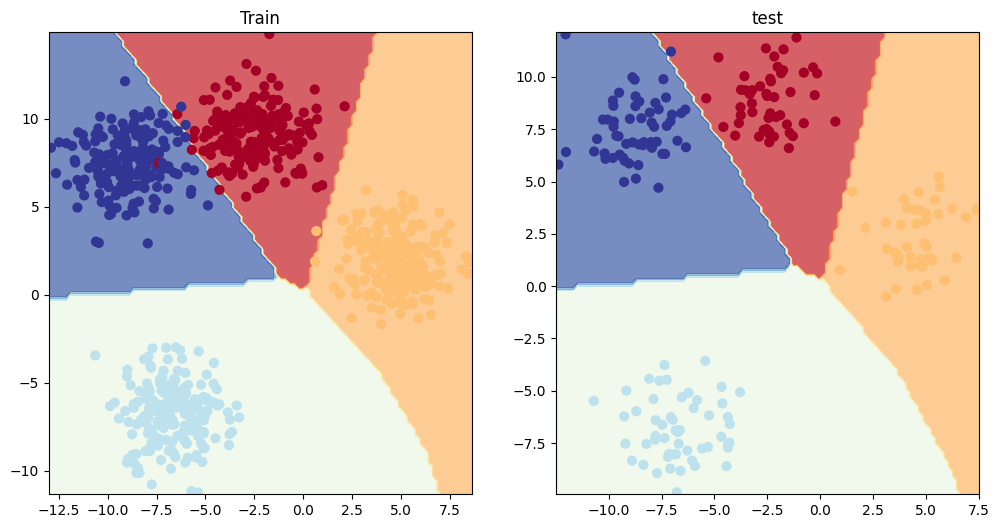

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

# A few more classification metrics... (to evaluate classification model)

* Accuracy - `torchmetrocs.Accuracy()` out of 100 samples, how many does our model get right?
* Precision - `torchmetrics.Precision()`
* Recall - `torchmetrics.Recall()`
* F1 Score - `torchmetrics.F1Score()`
* Confusion Matrix
* Classification report

In [ ]:
try:
    from torchmetrics import Accuracy
except:
    !pip install torchmetrics==0.9.3 # this is the version we're using in this notebook (later versions exist here: https://torchmetrics.readthedocs.io/en/stable/generated/CHANGELOG.html#changelog)
    from torchmetrics import Accuracy

# Setup metric and make sure it's on the target device
torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)

# Calculate accuracy
torchmetrics_accuracy(y_preds, y_blob_test)

tensor(0.9950)